Titanic Survival Exploration with Decision Trees

In [77]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

%matplotlib inline

In [78]:
# Define the full file path to the Titanic dataset CSV file
filePath = 'D:/COURSES/Data Scientist/Udacity-DSND-master/Udacity-DSND-master/datasets/Titanic-Dataset.csv'

# Read the CSV file into a DataFrame using Pandas
df = pd.read_csv(filePath)

# Display the first few rows of the DataFrame to verify the data has been loaded correctly
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Recall that these are the various features present for each passenger on the ship:
- **Survived**: Outcome of survival (0 = No; 1 = Yes)
- **Pclass**: Socio-economic class (1 = Upper class; 2 = Middle class; 3 = Lower class)
- **Name**: Name of passenger
- **Sex**: Sex of the passenger
- **Age**: Age of the passenger (Some entries contain `NaN`)
- **SibSp**: Number of siblings and spouses of the passenger aboard
- **Parch**: Number of parents and children of the passenger aboard
- **Ticket**: Ticket number of the passenger
- **Fare**: Fare paid by the passenger
- **Cabin** Cabin number of the passenger (Some entries contain `NaN`)
- **Embarked**: Port of embarkation of the passenger (C = Cherbourg; Q = Queenstown; S = Southampton)

Since we're interested in the outcome of survival for each passenger or crew member, we can remove the **Survived** feature from this dataset and store it as its own separate variable `outcomes`. We will use these outcomes as our prediction targets.  
Run the code cell below to remove **Survived** as a feature of the dataset and store it in `outcomes`.

In [79]:
# Dimensions du dataset (nombre de lignes et de colonnes)
print("Dimensions du dataset Titanic :", df.shape)


Dimensions du dataset Titanic : (891, 12)


In [80]:
# Informations sur les variables
print("\nInformations sur les variables :\n")
print(df.info())


Informations sur les variables :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [81]:
# Checking for missing values in the dataset
missing_values = df.isnull().sum()

# Print the number of missing values for each column
print(missing_values)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


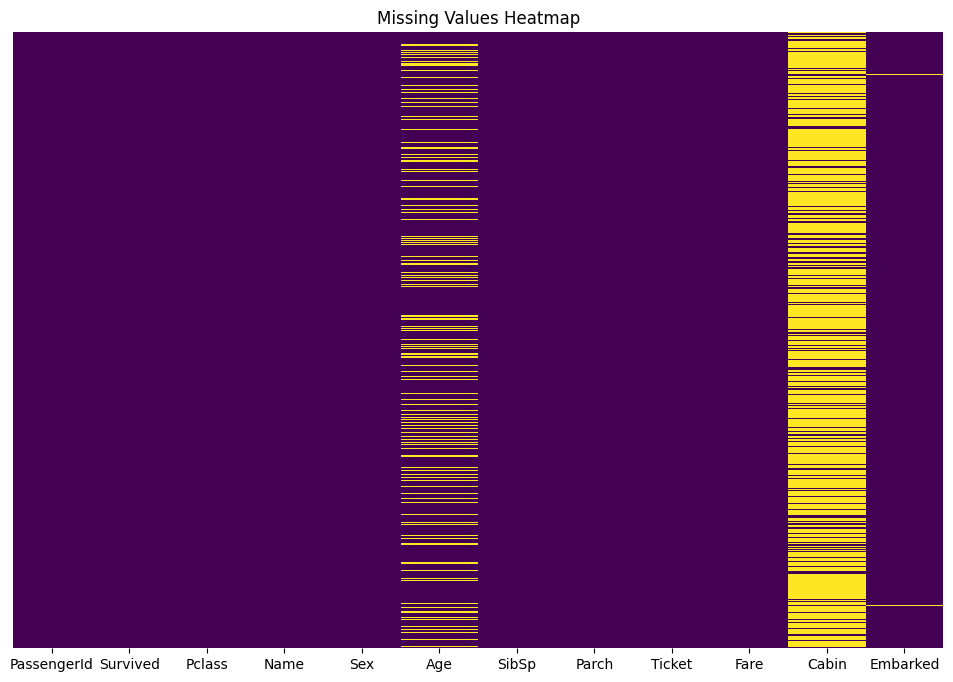

In [82]:
# Plot a heatmap to visualize missing values
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Values Heatmap')
plt.show()

- The mean and median (50th percentile) of numerical features can indicate central tendency.
- The standard deviation (std) shows the spread of data.
- The min and max values help identify outliers.
- The 25th and 75th percentiles (Q1 and Q3) show the range of the middle 50% of data.

In [83]:
# Generate descriptive statistics of the DataFrame
summary_statistics = df.describe()

# Print the summary statistics
display(summary_statistics)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


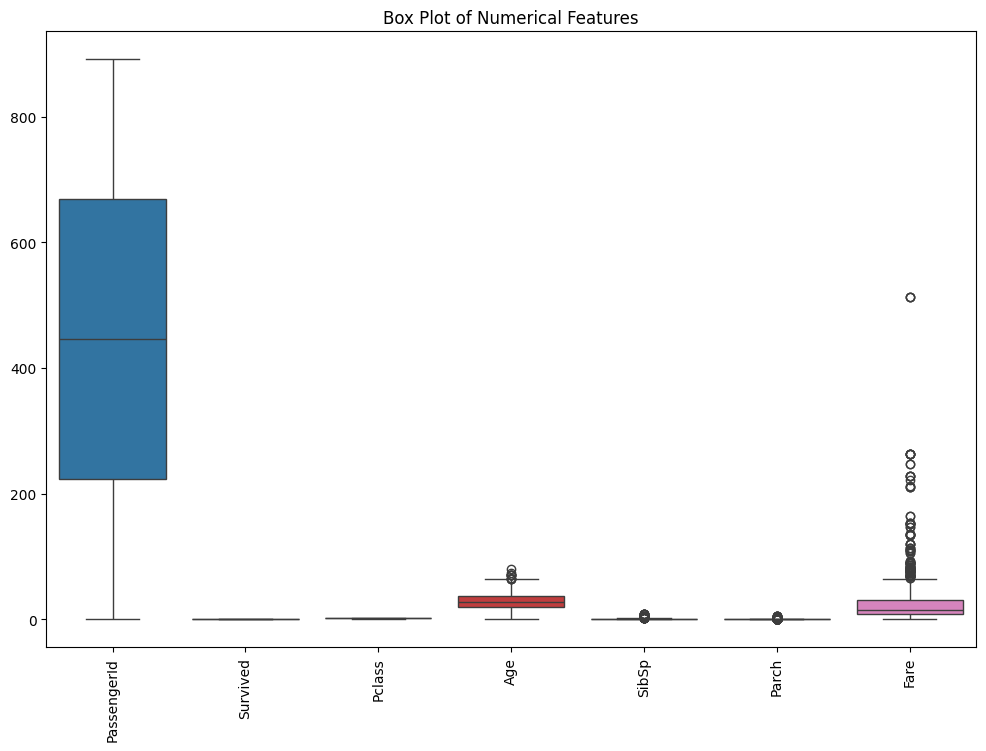

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot box plots for each numerical column
plt.figure(figsize=(12, 8))
sns.boxplot(data=df)
plt.title('Box Plot of Numerical Features')
plt.xticks(rotation=90)
plt.show()

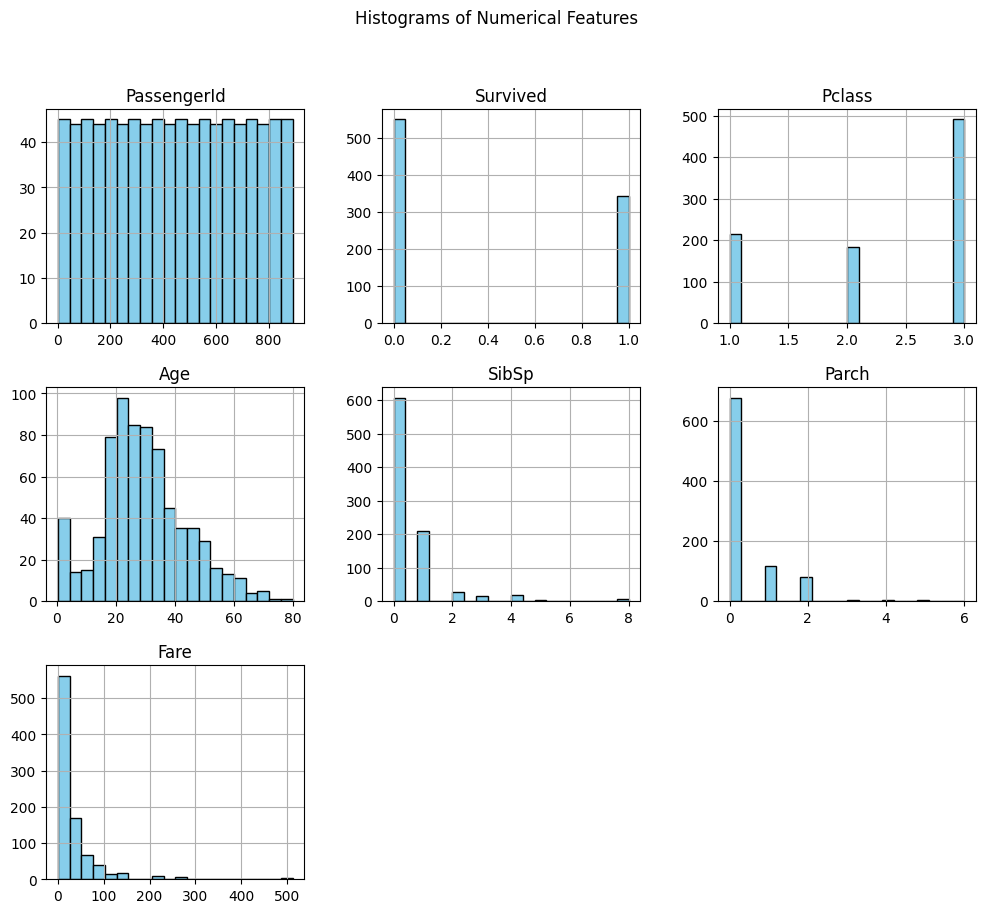

In [85]:
# Plot histograms for each numerical column
df.hist(figsize=(12, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle('Histograms of Numerical Features')
plt.show()

In [86]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

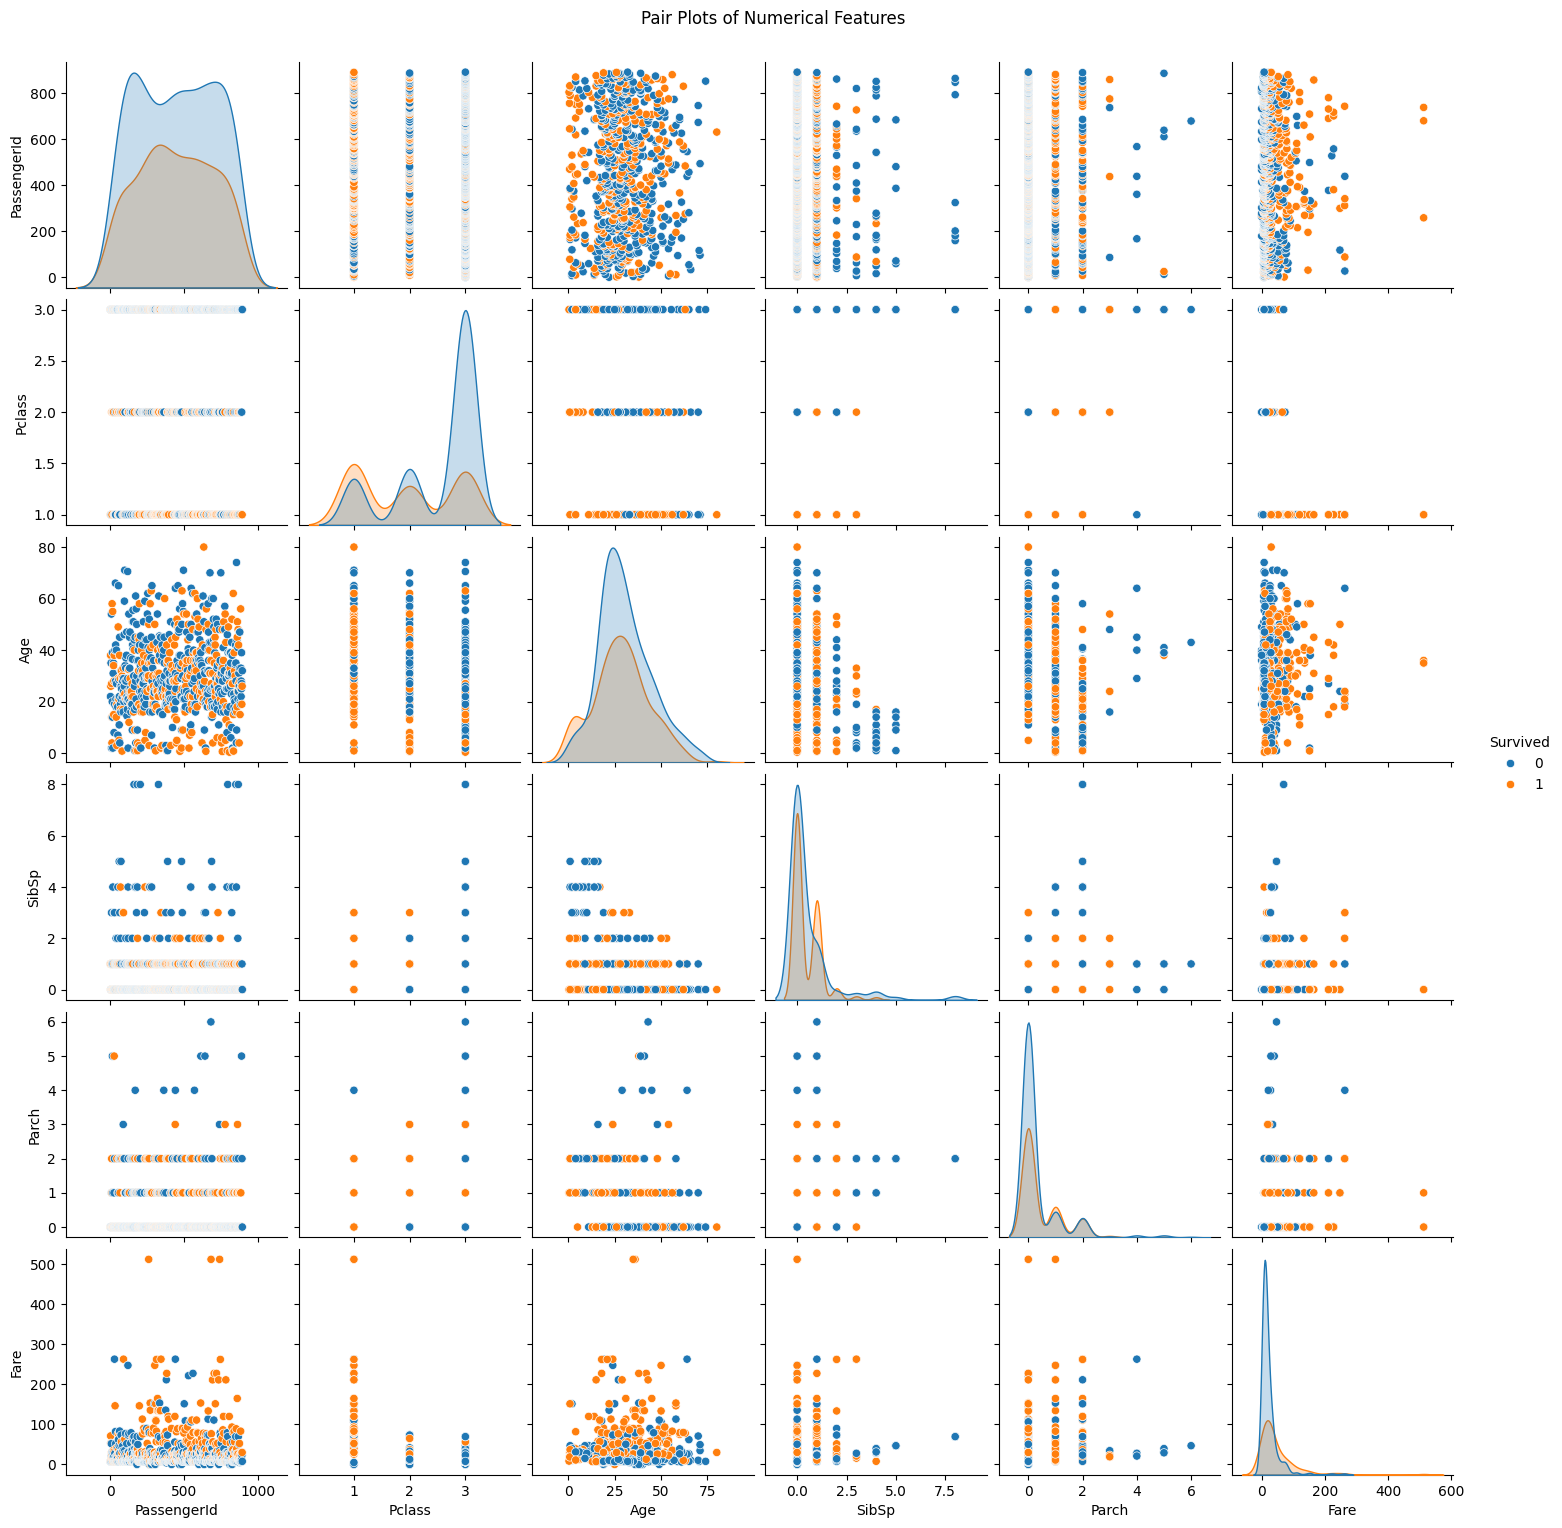

In [87]:
# Plot pair plots for numerical features
sns.pairplot(df, hue="Survived")
plt.suptitle('Pair Plots of Numerical Features', y=1.02)
plt.show()


In [88]:
# Separate the target variable (outcome) from the features
outcomes = df['Survived']

# Drop the 'Survived' column from the DataFrame to create the features DataFrame
Features = df.drop('Survived', axis=1)

# Display the first few rows of the features DataFrame to verify the separation
Features.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Preprocessing the data

In [89]:
# Convert categorical variables into dummy/indicator variables
features = pd.get_dummies(Features, dtype=int)


In [90]:
# Fill missing values in the features DataFrame with 0.0
features = features.fillna(0.0)
display(features.head())

,PassengerId,Pclass,Age,SibSp,Parch,Fare,"Name_Abbing, Mr. Anthony","Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)","Name_Abelson, Mr. Samuel",...,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
0,1,3,22.0,1,0,7.2500,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,38.0,1,0,71.2833,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,3,26.0,0,0,7.9250,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,3,35.0,0,0,8.0500,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


Training the model

In [91]:
from sklearn.model_selection import train_test_split

""" Split the data into training and testing sets
    features: Input features for training and testing
    outcomes: Target variable (survival status) for training and testing
    test_size: Specifies the proportion of the dataset to include in the test split (here, 20%)
    random_state: Controls the shuffling applied to the data before splitting, ensuring reproducibility (random seed) """

x_train, x_test, y_train, y_test = train_test_split(features, outcomes, test_size=0.2, random_state=42)

# Print the dimensions (shape) of the training and testing sets to verify the split
print("Training set - Features:", x_train.shape, "Labels:", y_train.shape)
print("Testing set  - Features:", x_test.shape, " Labels:", y_test.shape)

Training set - Features: (712, 1730) Labels: (712,)
Testing set  - Features: (179, 1730)  Labels: (179,)


In [92]:
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree classifier object
model = DecisionTreeClassifier()

# Train the Decision Tree classifier using the training data
model.fit(x_train, y_train)


DecisionTreeClassifier()

## Testing the model

In [93]:
# Predictions on the training set
y_train_pred = model.predict(x_train)

# Predictions on the testing set
y_test_pred = model.predict(x_test)

In [94]:
from sklearn.metrics import accuracy_score

# Calculate accuracy score for the training set predictions
train_accuracy = accuracy_score(y_train, y_train_pred)

# Calculate accuracy score for the testing set predictions
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print the accuracy scores
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 1.0
Testing Accuracy: 0.8044692737430168


The model shows excellent performance on the training data (100% accuracy), indicating it has learned the training data perfectly, the slightly lower testing accuracy (81%) suggests it still performs well on new data but might benefit from further evaluation to mitigate potential overfitting and ensure robust generalization

# Model Optimisation

Ok, high training accuracy and a lower testing accuracy. We may be overfitting a bit.

So now it's your turn to shine! Train a new model, and try to specify some parameters in order to improve the testing accuracy, such as:
- `max_depth`
- `min_samples_leaf`
- `min_samples_split`

You can use your intuition, trial and error, or even better, feel free to use Grid Search!

**Challenge:** Try to get to 85% accuracy on the testing set. If you'd like a hint, take a look at the solutions notebook next.

In [95]:
# Create a Decision Tree classifier object with specified parameters
model = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=8)

# Train the Decision Tree classifier using the training data
model.fit(x_train, y_train)

# Make predictions on the training set
y_train_pred = model.predict(x_train)

# Make predictions on the testing set
y_test_pred = model.predict(x_test)


In [96]:
# Calculate accuracy score for the training set predictions
train_accuracy = accuracy_score(y_train, y_train_pred)

# Calculate accuracy score for the testing set predictions
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print the accuracy scores
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 0.8904494382022472
Testing Accuracy: 0.8547486033519553


In [97]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Evaluation metrics for training set
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

# Evaluation metrics for testing set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

# Print evaluation metrics
print("Training Accuracy:", train_accuracy)
print("Training Precision:", train_precision)
print("Training Recall:", train_recall)
print("Training F1 Score:", train_f1)

print("\nTesting Accuracy:", test_accuracy)
print("Testing Precision:", test_precision)
print("Testing Recall:", test_recall)
print("Testing F1 Score:", test_f1)



Training Accuracy: 0.8904494382022472
Training Precision: 0.8925619834710744
Training Recall: 0.8059701492537313
Training F1 Score: 0.8470588235294118

Testing Accuracy: 0.8547486033519553
Testing Precision: 0.8529411764705882
Testing Recall: 0.7837837837837838
Testing F1 Score: 0.8169014084507042


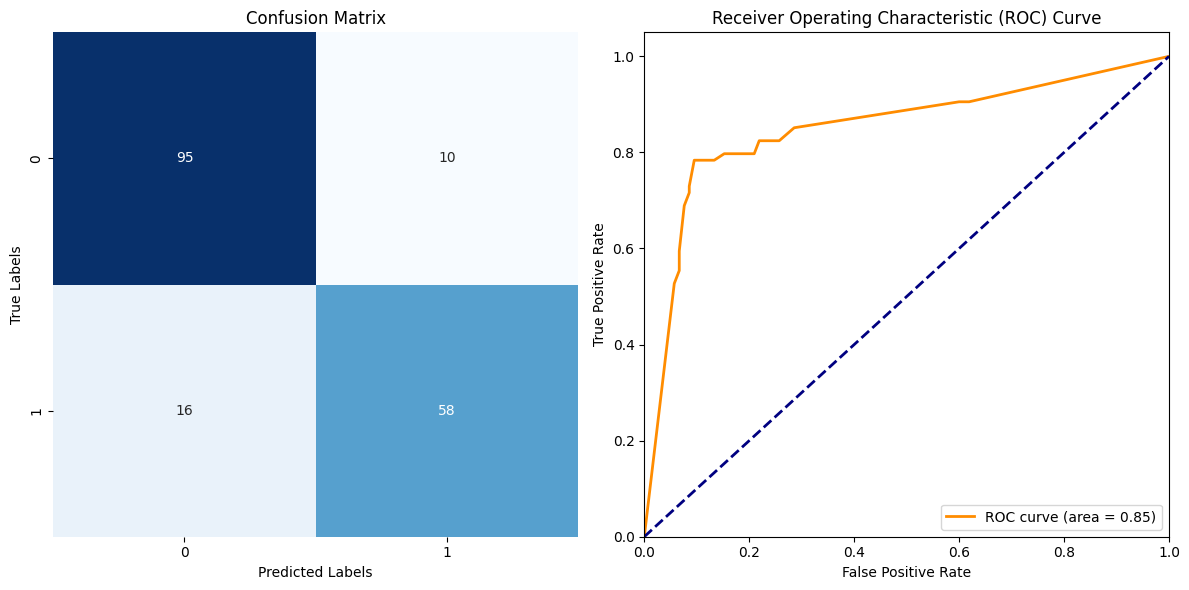

In [98]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
# Calculate predictions for the testing set
y_test_pred = model.predict(x_test)
y_test_prob = model.predict_proba(x_test)[:, 1]  # Probability of positive class for ROC curve

# Generate confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
roc_auc = auc(fpr, tpr)

# Plotting Confusion Matrix
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Plotting ROC Curve
plt.subplot(1, 2, 2)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

### Confusion Matrix: 
The model has a relatively high number of true positives and true negatives, indicating good performance. However, there are some false positives and false negatives, which suggest areas for improvement.

### ROC Curve: 
The AUC of 0.85 suggests that the model is quite effective at distinguishing between the positive and negative classes.

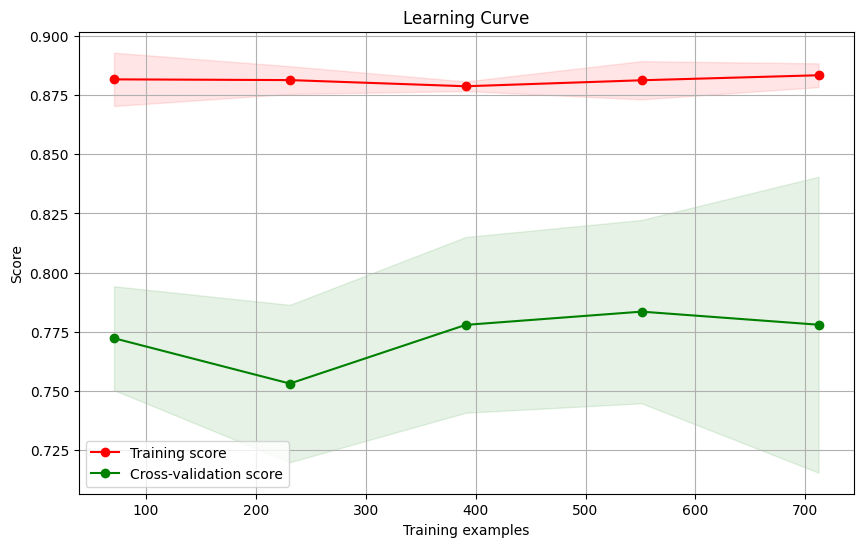

In [99]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Define function to plot learning curve
def plot_learning_curve(estimator, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    """
    plt.figure(figsize=(10, 6))
    plt.title("Learning Curve")
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.legend(loc="best")

    return plt

# Usage example:
# Assuming 'model' is your trained classifier and 'features', 'outcomes' are your data
plot_learning_curve(model, features, outcomes, cv=5, n_jobs=-1)
plt.show()


The learning curve shows that as the number of training examples increases, the model’s performance on unseen data improves. Initially, there’s a gap between the training and cross-validation scores, indicating overfitting. However, as more data is added, the scores converge, suggesting better generalization and reduced overfitting.

c:\Users\bayir\Documents\ml_project\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


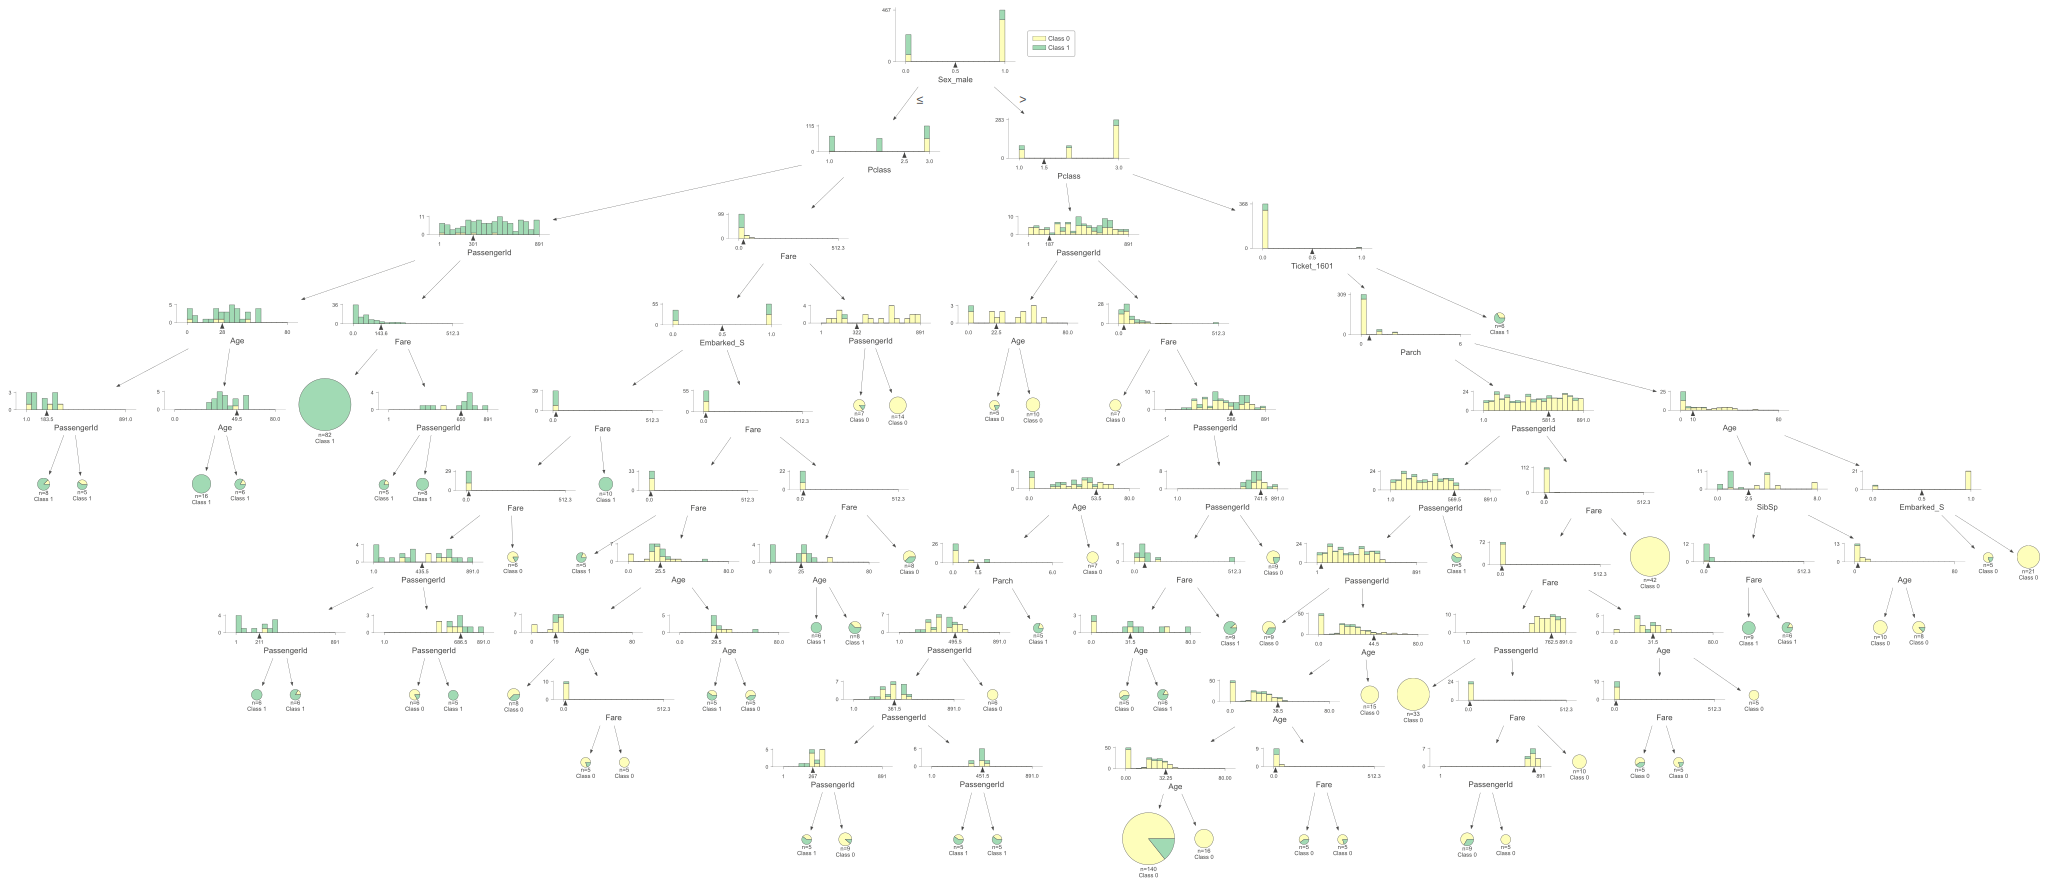

In [110]:
# plot the tree 
import dtreeviz

# Getting the list of variables
feature_names = list(x_train.columns)

# visualizing the tree
viz_model = dtreeviz.model(model,
                           X_train=x_train, y_train=y_train, 
                           feature_names=feature_names)

v = viz_model.view(fancy=True)     # render as SVG into internal object 
v

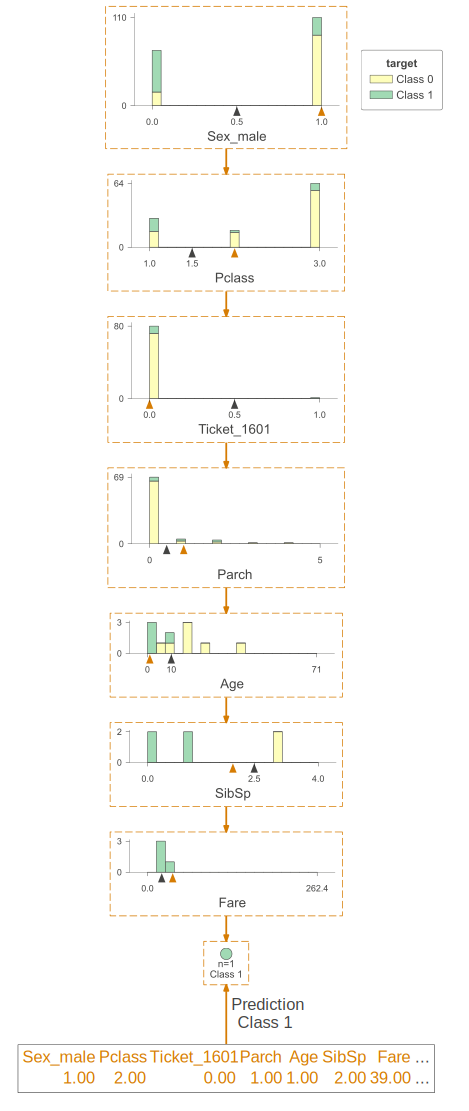

In [115]:
# get a random point
rand = np.random.randint(0, len(features))
sample_point = features.iloc[rand,:].values

# visualizing the path for the point
v = viz_model.view(fancy=True,scale=1.5,x=sample_point,show_just_path=True)
v

In [130]:
# 2. Combine predictions with PassengerId
results = pd.DataFrame({
    "PassengerId": x_test['PassengerId'],  # Assuming 'PassengerId' is a column in your testing set
    "Survived": y_test_pred})
results.head(20)

,PassengerId,Survived
709,710,1
439,440,0
840,841,0
720,721,1
39,40,1
290,291,1
300,301,1
333,334,0
208,209,1
136,137,1


In [121]:
# 3. Save results to a CSV file
results.to_csv('predictions.csv', index=False)

print("Predictions saved to predictions.csv")

Predictions saved to predictions.csv
